In [ ]:
# @title Descargando Datos y Primeras Configuraciones del Entorno

try:
  import ultralytics
except ImportError:
  !pip install -q ultralytics

import os

if not os.path.exists("/content/PlateNumbers.v1i.yolov11"):
  !gdown -q 1C2nL1GZljQ6gaODY2eMkY_MnyuRb342V -O datos.zip
  !unzip -q datos.zip -d datos
  !mv "/content/datos/content/drive/MyDrive/PlateNumbers.v1i.yolov11" /content/
  !rm -rf datos datos.zip
  print("✅ Primer dataset descargado y extraído.")
else:
  print("✅ Primer dataset ya existe.")

# ------------------------------
# Descargar y extraer segundo dataset
# ------------------------------
second_dataset_id = "1apsTf0URxnaz1hLP8A8-JTYrUae4thvW"
second_dataset_zip = "dataset2.zip"
second_dataset_path = "/content/dataset2"

if not os.path.exists(second_dataset_path):
  !gdown -q {second_dataset_id} -O {second_dataset_zip}
  !unzip -q {second_dataset_zip} -d {second_dataset_path}
  !rm {second_dataset_zip}
  print("✅ Segundo dataset descargado y extraído.")
else:
  print("✅ Segundo dataset ya estaba disponible.")

# ------------------------------
# Combinar segundo dataset con el primero
# ------------------------------
original_dataset_path = "/content/PlateNumbers.v1i.yolov11"

for split in ['train', 'valid', 'test']:
  for folder in ['images', 'labels']:
    src = os.path.join(second_dataset_path, split, folder)
    dst = os.path.join(original_dataset_path, split, folder)
    if os.path.exists(src):
      !cp -n -r {src}/* {dst}

print("✅ Datasets combinados correctamente.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.5/983.5 kB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 117.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 90.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 53.4 MB/s eta 0:00:00
✅ Primer dataset descargado y extraído.
✅ Segundo dataset descargado y extraído.
✅ Datasets combinados correctamente.


In [ ]:
import cv2
import yaml
import random
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image as IPyImage
from ultralytics import YOLO

ModuleNotFoundError: No module named 'ultralytics'

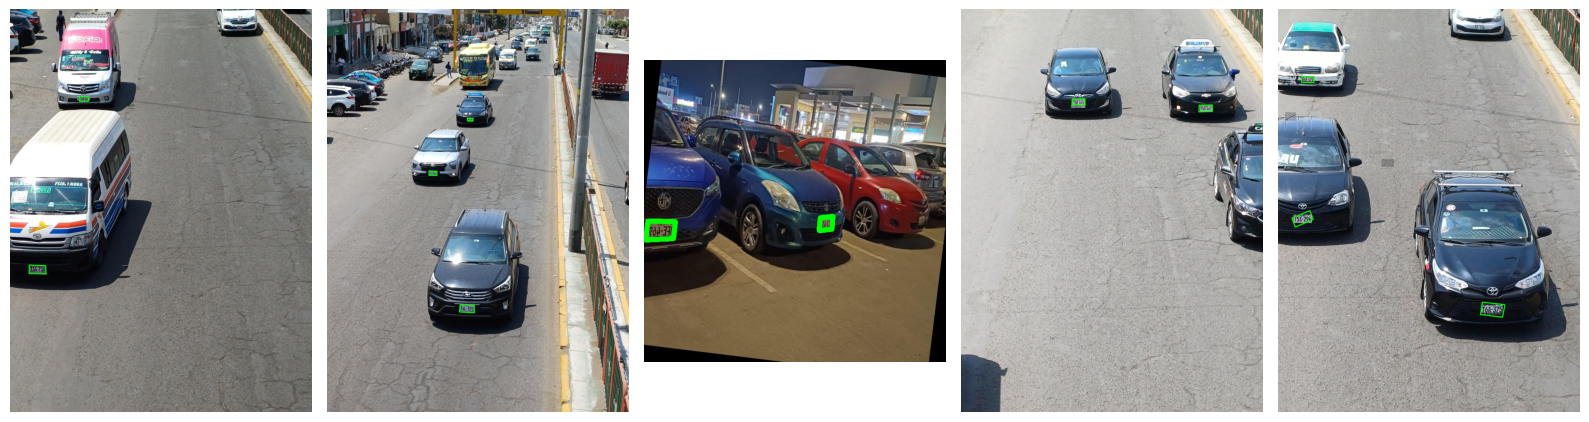

In [ ]:
# @title Una muestra del Dataset

def draw_boxes(img_path, label_path):
  image = cv2.imread(img_path)
  if image is None:
    print(f"Error al leer la imagen: {img_path}")
    return None

  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  h, w, _ = image.shape

  if os.path.exists(label_path):
    with open(label_path, 'r') as f:
      for line in f:
        parts = line.strip().split()
        if len(parts) > 5:
          class_id = int(parts[0])
          polygon = list(map(float, parts[1:]))

          polygon = [(int(polygon[i] * w), int(polygon[i + 1] * h)) for i in range(0, len(polygon), 2)]

          cv2.polylines(image, [np.array(polygon)], isClosed=True, color=(0, 255, 0), thickness = 10)

  return image

base_path = "/content/PlateNumbers.v1i.yolov11/train"
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

image_files = [f for f in os.listdir(images_path) if f.endswith(('.jpg', '.png'))]
sampled_files = random.sample(image_files, 5)

plt.figure(figsize=(16, 5))
for i, img_file in enumerate(sampled_files):
  img_path = os.path.join(images_path, img_file)
  label_file = os.path.splitext(img_file)[0] + '.txt'
  label_path = os.path.join(labels_path, label_file)

  img = draw_boxes(img_path, label_path)
  plt.subplot(1, len(sampled_files), i + 1)
  plt.imshow(img)
  plt.axis('off')
plt.tight_layout()
plt.show()

## YOLOv11

In [ ]:
data = {
    'path': '/content/PlateNumbers.v1i.yolov11',
    'train': 'train/images',
    'val': 'valid/images',
    'test': 'test/images',
    'names': {
        0: ['Placa']
    }
}

with open('/content/PlateNumbers.v1i.yolov11/data.yaml', 'w') as file:
  yaml.dump(data, file,
            default_flow_style = False,
            sort_keys = False)
  file.close()

In [ ]:
model = YOLO("yolo11n.pt")
results = model.train(data = "/content/PlateNumbers.v1i.yolov11/data.yaml",
                      epochs = 30,
                      imgsz = 640,
                      plots = True,
                    )

Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/PlateNumbers.v1i.yolov11/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=

train: Scanning /content/PlateNumbers.v1i.yolov11/train/labels... 1613 images, 0 backgrounds, 479 corrupt: 100%|██████████| 1613/1613 [00:00<00:00, 1976.84it/s]

train: /content/PlateNumbers.v1i.yolov11/train/images/10_jpeg.rf.6478065a6f26d9ee13c2614f858626cc.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/PlateNumbers.v1i.yolov11/train/images/10_jpeg.rf.7750f91327540829434525dbca6efed3.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/PlateNumbers.v1i.yolov11/train/images/11_jpg.rf.b1a843483e14feff67c4590314b361e1.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/PlateNumbers.v1i.yolov11/train/images/11_jpg.rf.e7dc9b6bfdee9099a2fe58043d130854.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: /content/PlateNumbers.v1i.yolov11/train/images/14_png.rf.b6f0504cb062059aa1ee444d89f15ed3.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class co

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1235.6±1357.3 MB/s, size: 459.9 KB)


val: Scanning /content/PlateNumbers.v1i.yolov11/valid/labels... 134 images, 0 backgrounds, 28 corrupt: 100%|██████████| 134/134 [00:00<00:00, 740.51it/s]

val: /content/PlateNumbers.v1i.yolov11/valid/images/18_jpg.rf.d9891b0abeed11c6edecff0beb6c84e9.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/PlateNumbers.v1i.yolov11/valid/images/20231009_192616_jpg.rf.1888260975da15fd797f79af6ddc98e4.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/PlateNumbers.v1i.yolov11/valid/images/20231009_192913_jpg.rf.f6b0b32342bf21f2c185f99b316f537b.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/PlateNumbers.v1i.yolov11/valid/images/20231009_194247_jpg.rf.b3bfb65551dbce3c1cbde5e300ddc203.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: /content/PlateNumbers.v1i.yolov11/valid/images/20231009_194527_jpg.rf.bdbf0eb6fb3da2516ae60733c5eeb237.jpg: ignoring corrupt image/label

val: New cache created: /content/PlateNumbers.v1i.yolov11/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 186, len(boxes) = 203. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.41G      1.917      3.648      1.039         46        640: 100%|██████████| 71/71 [01:35<00:00,  1.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:05<00:00,  1.37s/it]

                   all        106        203    0.00516      0.808     0.0305    0.00877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.55G       1.64      1.936     0.9017         44        640: 100%|██████████| 71/71 [01:34<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.66it/s]

                   all        106        203       0.48      0.692      0.469       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.56G      1.616      1.564      0.907         37        640: 100%|██████████| 71/71 [01:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        106        203      0.817      0.791      0.873      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.58G      1.602      1.301     0.8991         44        640: 100%|██████████| 71/71 [01:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.52it/s]

                   all        106        203      0.852      0.878      0.904      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30       2.6G      1.486      1.132     0.8858         39        640: 100%|██████████| 71/71 [01:31<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.78it/s]

                   all        106        203      0.917      0.874      0.921       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.61G      1.456      1.057     0.8863         60        640: 100%|██████████| 71/71 [01:31<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]


                   all        106        203      0.829      0.884      0.884      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.62G      1.487      1.002     0.8842         41        640: 100%|██████████| 71/71 [01:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        106        203      0.876      0.906      0.902      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.64G       1.45     0.9837     0.8764         54        640: 100%|██████████| 71/71 [01:24<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


                   all        106        203      0.865      0.853      0.891      0.505

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.65G      1.428     0.9518      0.876         37        640: 100%|██████████| 71/71 [01:34<00:00,  1.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        106        203       0.83      0.803      0.839      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.67G      1.416     0.9311     0.8734         52        640: 100%|██████████| 71/71 [01:29<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        106        203      0.815      0.901      0.863      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.68G       1.39     0.9185     0.8594         45        640: 100%|██████████| 71/71 [01:26<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.77it/s]

                   all        106        203      0.887      0.885      0.902      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30       2.7G      1.382     0.9148     0.8774         49        640: 100%|██████████| 71/71 [01:21<00:00,  1.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        106        203      0.883      0.877      0.913      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.71G      1.364     0.8982     0.8608         40        640: 100%|██████████| 71/71 [01:30<00:00,  1.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.14it/s]

                   all        106        203      0.883      0.872      0.926      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.73G      1.395     0.8894     0.8717         53        640: 100%|██████████| 71/71 [01:31<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        106        203      0.896      0.887      0.906      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.74G       1.36     0.8868     0.8621         57        640: 100%|██████████| 71/71 [01:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.51it/s]

                   all        106        203      0.912      0.864       0.91      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.76G      1.337     0.8742     0.8578         40        640: 100%|██████████| 71/71 [01:29<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        106        203      0.869      0.915      0.882       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.77G      1.325     0.8662     0.8574         40        640: 100%|██████████| 71/71 [01:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        106        203      0.874      0.887      0.912      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.79G      1.324     0.8693     0.8601         40        640: 100%|██████████| 71/71 [01:31<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        106        203      0.874      0.906       0.88      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30       2.8G      1.303     0.8757     0.8565         46        640: 100%|██████████| 71/71 [01:28<00:00,  1.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        106        203      0.908      0.921      0.908      0.546



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.82G      1.296     0.8625     0.8532         43        640: 100%|██████████| 71/71 [01:27<00:00,  1.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        106        203      0.902      0.863      0.916      0.601


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.83G      1.228       0.87     0.8531         27        640: 100%|██████████| 71/71 [01:35<00:00,  1.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        106        203      0.906      0.882      0.926      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.85G       1.24     0.8398     0.8517         27        640: 100%|██████████| 71/71 [01:23<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        106        203      0.926      0.897      0.937      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.86G      1.218     0.8401     0.8537         28        640: 100%|██████████| 71/71 [01:17<00:00,  1.08s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]

                   all        106        203      0.906      0.916      0.914      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.88G      1.199     0.8376     0.8547         26        640: 100%|██████████| 71/71 [01:30<00:00,  1.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.66it/s]

                   all        106        203      0.783      0.946       0.82      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.89G      1.202     0.8481     0.8452         21        640: 100%|██████████| 71/71 [01:33<00:00,  1.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all        106        203      0.875      0.936      0.876      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.91G      1.201     0.8249     0.8498         27        640: 100%|██████████| 71/71 [01:25<00:00,  1.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.62it/s]

                   all        106        203      0.899      0.926      0.904      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.92G      1.191      0.819     0.8453         35        640: 100%|██████████| 71/71 [01:32<00:00,  1.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        106        203      0.891      0.921      0.907      0.579



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.94G      1.159       0.81      0.845         21        640: 100%|██████████| 71/71 [01:26<00:00,  1.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]


                   all        106        203      0.894      0.897      0.888      0.578

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.95G      1.154     0.8113     0.8504         29        640: 100%|██████████| 71/71 [01:31<00:00,  1.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        106        203      0.886      0.921      0.895      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.97G      1.141     0.8075     0.8391         31        640: 100%|██████████| 71/71 [01:29<00:00,  1.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.41it/s]

                   all        106        203       0.88      0.931      0.875      0.574



30 epochs completed in 0.776 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.115 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.85s/it]


                   all        106        203      0.905      0.882      0.926      0.609
Speed: 0.2ms preprocess, 3.0ms inference, 0.0ms loss, 4.1ms postprocess per image
Results saved to runs/detect/train


## Traking

In [ ]:
# model = YOLO("/content/runs/detect/train/weights/best.pt")

# video_path = "/content/nuevo.mp4"
# cap = cv2.VideoCapture(video_path)

# out = cv2.VideoWriter("output_tracked.mp4",
#                       cv2.VideoWriter_fourcc(*'mp4v'), 30.0,
#                       (int(cap.get(3)), int(cap.get(4))))

In [ ]:
# while cap.isOpened():
#   ret, frame = cap.read()
#   if not ret:
#     break

#   results = model.track(frame, persist = True)[0]

#   if results.boxes.id is not None:
#     boxes = results.boxes.xyxy.cpu().numpy()
#     ids = results.boxes.id.cpu().numpy().astype(int)

#     for box, obj_id in zip(boxes, ids):
#       x1, y1, x2, y2 = map(int, box)
#       cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
#       cv2.putText(frame, f"ID: {obj_id}", (x1, y1 - 10),
#                   cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 255), 2)

#   out.write(frame)

# cap.release()
# out.release()
# print("Tracking terminado y guardado en output_tracked.mp4")

requirements: Ultralytics requirement ['lap>=0.5.12'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 38.1 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 2.7s, installed 1 package: ['lap>=0.5.12']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


0: 640x384 (no detections), 47.6ms
Speed: 2.5ms preprocess, 47.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 10.3ms
Speed: 2.6ms preprocess, 10.3ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 12.8ms
Speed: 2.6ms preprocess, 12.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 16.0ms
Speed: 2.3ms preprocess, 16.0ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 10.3ms
Speed: 2.3ms preprocess, 10.3ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0:

## Cloud Vision

In [ ]:
#!pip install ultralytics -q
#!pip install google-cloud-vision -q
from google.cloud import vision
from collections import defaultdict
from ultralytics import YOLO
import re
import os

In [ ]:
credentials_json_path = "/content/gcloud_license_detector_account.json"
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = credentials_json_path
vision_client = vision.ImageAnnotatorClient()

In [ ]:
def extract_text_with_vision_api(image_bytes):
  try:
    image = vision.Image(content=image_bytes)
    response = vision_client.text_detection(image=image)

    if response.error.message:
      print(f"Error de Vision API: {response.error.message}")
      return "Error"

    texts = response.text_annotations
    if not texts:
      return "No texto"

    full_text = texts[0].description.strip()

    # Extraer placa peruana: AAA-123 o similar
    plate_pattern = r'[A-Z]{1,3}-?[0-9]{3,4}'
    matches = re.findall(plate_pattern, full_text)

    if matches:
      return matches[0].upper()
    return full_text  # Por si detecta algo útil pero no con ese patrón

  except Exception as e:
    print(f"Error OCR: {e}")
    return "Error"


# def preprocess_plate_roi(roi, top_crop = 10, bottom_crop = 5):
#   height = roi.shape[0]
#   top_crop = max(0, min(top_crop, height - 1))
#   bottom_crop = max(0, min(bottom_crop, height - top_crop - 1))
#   roi_cropped = roi[top_crop: height - bottom_crop, :]
#   return roi_cropped

# def preprocess_plate_roi(roi: np.ndarray) -> np.ndarray:
#   gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
#   blur = cv2.GaussianBlur(gray, (3, 3), 0)

#   eq = cv2.equalizeHist(blur)

#   thresh = cv2.adaptiveThreshold(
#       eq, 255,
#       cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,
#       21, 10
#   )

#   kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#   clean = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)
#   return clean

In [ ]:
model = YOLO("/content/YOLO_FINAL.pt")
ocr_histories = defaultdict(list)
ocr_window_size = 5  # Cuántos OCR guardar por ID

cap = cv2.VideoCapture("/content/placas_UNALM_1.mp4")
out = cv2.VideoWriter("output_tracked_ocr_9.mp4", cv2.VideoWriter_fourcc(*'mp4v'),
                      30.0, (int(cap.get(3)), int(cap.get(4))))

In [ ]:
while cap.isOpened():
  ret, frame = cap.read()
  if not ret:
    break

  results = model.track(frame, persist=True)[0]

  if results.boxes.id is not None:
    boxes = results.boxes.xyxy.cpu().numpy()
    ids = results.boxes.id.cpu().numpy().astype(int)

    for box, obj_id in zip(boxes, ids):
      x1, y1, x2, y2 = map(int, box)

      # Dibujar caja e ID
      cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)

      # Recortar la placa del frame
      roi = frame[y1:y2, x1:x2]
      #roi_proc = preprocess_plate_roi(roi)
      _, buffer = cv2.imencode(".jpg", roi)
      image_bytes = buffer.tobytes()

      # Ejecutar OCR
      plate_text = extract_text_with_vision_api(image_bytes)

      if plate_text and plate_text != "Error":
        ocr_histories[obj_id].append(plate_text)

      # Mantener últimos N OCRs
      if len(ocr_histories[obj_id]) > ocr_window_size:
        ocr_histories[obj_id].pop(0)

      # Mostrar el texto más común (más confiable)
      if ocr_histories[obj_id]:
        most_common_text = max(set(ocr_histories[obj_id]), key = ocr_histories[obj_id].count)
        label = most_common_text
        cv2.putText(frame, label, (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 255), 3)

  out.write(frame)

cap.release()
out.release()
print("Video con tracking y OCR guardado como output_tracked_ocr.mp4")


0: 640x384 (no detections), 162.6ms
Speed: 5.6ms preprocess, 162.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 146.9ms
Speed: 2.9ms preprocess, 146.9ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 134.4ms
Speed: 4.2ms preprocess, 134.4ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 151.7ms
Speed: 5.1ms preprocess, 151.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 153.0ms
Speed: 5.1ms preprocess, 153.0ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 141.3ms
Speed: 4.4ms preprocess, 141.3ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 148.2ms
Speed: 4.2ms preprocess, 148.2ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 384)

0: 640x384 (no detections), 132.9ms
Speed: 5.1ms prepr

In [ ]:
!ffmpeg -i output_tracked_ocr_8.mp4 -vcodec libx264 -acodec aac -preset fast -crf 28 -movflags +faststart output_placas_whatsapp_2.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab